<a href="https://colab.research.google.com/github/AndrewSundaram/VU_SmartCities/blob/master/EnergyWorkbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook Setup

In [53]:
!git clone https://github.com/univ-3360-vu-smartcities/AlumniHallDataAnalysis.git
!mkdir data

Cloning into 'AlumniHallDataAnalysis'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 86 (delta 49), reused 72 (delta 35), pack-reused 0
Unpacking objects: 100% (86/86), done.
mkdir: cannot create directory ‘data’: File exists


In [55]:
cd /content/AlumniHallDataAnalysis

/content/AlumniHallDataAnalysis


In [0]:
!mkdir data

In [56]:
!pip install -r requirements.txt
!pip install -U ipykernel  # To prevent notebook from crashing in Colab

Requirement already up-to-date: ipykernel in /usr/local/lib/python3.6/dist-packages (5.2.1)


In [0]:
# helper module to load the Alumni Hall data and process it
from datautils import dataprocessor as dp

## Occupancy Data Import

In [73]:
# load data path
df = dp.readfile('./data/occupancyStatus.csv',
                      timeformat='%m/%d/%Y %H:%M',
                      dateheading='Date')

# Basic preprocessing read data and perform certain available operations and return processed dataframe. 
# Note: order of operations are important. For example we cannot parse datetime from the data before converting it
# from file to dataframe(file2df)
processmethods = ['file2df', 'datetime_parse_df']
df = df.return_df(processmethods=processmethods)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  if __name__ == '__main__':


In [0]:
# Drop Columns where more than 5% of values are NaN
df = dp.dropNaNcols(df, threshold = 0.95)

# Drop entire rows with NaN cells
df = dp.dropNaNrows(df)

In [75]:
df.head()

,MEMORIAL_HALL_202_Indoor_Unit_68.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_67.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_66.occupancyStatus,TUTORING_010_Indoor_Unit_86.occupancyStatus,COORIDOR_006A_Indoor_Unit_34.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_61.occupancyStatus,MEETING_117C_Indoor_Unit_62.occupancyStatus,CATERING_206_Indoor_Unit_81.occupancyStatus,READING_ROOM_206_Indoor_Unit_94.occupancyStatus,READING_ROOM_206_Indoor_Unit_95.occupancyStatus,OFFICE_115_Indoor_Unit_80.occupancyStatus,READING_ROOM_206_Indoor_Unit_93.occupancyStatus,STORAGE_014_Indoor_Unit_110.occupancyStatus,OFFICE_115_Indoor_Unit_77.occupancyStatus,ELEV_MACH_008_Indoor_Unit_39.occupancyStatus,UTILITY_004_Indoor_Unit_16.occupancyStatus,TUTORING_010_Indoor_Unit_10.occupancyStatus,TUTORING_010_Indoor_Unit_12.occupancyStatus,MEETING_117B_Indoor_Unit_19.occupancyStatus,MEETING_117A_Indoor_Unit_63.occupancyStatus,RECEIVING_109_Indoor_Unit_59.occupancyStatus,READING_ROOM_206_Indoor_Unit_92.occupancyStatus,TUTORING_010_Indoor_Unit_11.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_21.occupancyStatus,OFFICE_303_Indoor_Unit_102.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_97.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_98.occupancyStatus,LOBBY_111_Indoor_Unit_57.occupancyStatus,READING_ROOM_206_INDOR_UNIT_96.occupancyStatus,GENT_RR_016_Indoor_Unit_15.occupancyStatus,LOBBY_003_Indoor_Unit_13.occupancyStatus,CORRIDOR_108_Indoor_Unit_60.occupancyStatus,CORRIDOR_203_Indoor_Unit_64.occupancyStatus,CORRIDOR_309_Indoor_Unit_25.occupancyStatus,LOBBY_200_Indoor_Unit_79.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_99.occupancyStatus,OFFICE_304_Indoor_Unit_101.occupancyStatus,COORIDOR_006_Indoor_Unit_37.occupancyStatus,OFFICE_301_Indoor_Unit_104.occupancyStatus,CORRIDOR_310_Indoor_Unit_69.occupancyStatus,...,WRITING_STUDIO_113_Indoor_Unit_20.occupancyStatus,STAFF_KITCH_018_Indoor_Unit_113.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_76.occupancyStatus,MECH_ROOM_400_Indoor_Unit_106.occupancyStatus,MECH_ROOM_401_Indoor_Unit_112.occupancyStatus,READING_ROOM_206_Indoor_Unit_108.occupancyStatus,OFFICE_114_Indoor_Unit_78.occupancyStatus,STORAGE_001_Indoor_Unit_49.occupancyStatus,CORRIDOR_310_Indoor_Unit_72.occupancyStatus,CORRIDOR_013_Indoor_Unit_111.occupancyStatus,LOBBY_204_Indoor_Unit_65.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_100.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_83.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_86.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_87.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_84.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_85.occupancyStatus,WOMEN_RR_011_Indoor_Unit_38.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_82.occupancyStatus,CAFE_103_Indoor_Unit_55.occupancyStatus,READING_ROOM_206_Indoor_Unit_91.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_88.occupancyStatus,OFFICE_305_Indoor_Unit_74.occupancyStatus,LOBBY_300_Indoor_Unit_103.occupancyStatus,READING_ROOM_206_Indoor_Unit_89.occupancyStatus,CAFE_103_Indoor_Unit_51.occupancyStatus,ELEC_ROOM_005_Indoor_Unit_18.occupancyStatus,CAFE_103_Indoor_Unit_54.occupancyStatus,CAFE_103_Indoor_Unit_52.occupancyStatus,LOBBY_101_Indoor_Unit_48.occupancyStatus,CAFE_103_Indoor_Unit_56.occupancyStatus,WOMEN_RR_312_Indoor_Unit_70.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_58.occupancyStatus,TUTORING_010_Indoor_Unit_7.occupancyStatus,OFFICE_116_Indoor_Unit_24.occupancyStatus,TUTORING_010_Indoor_Unit_9.occupancyStatus,CAFE_103_Indoor_Unit_50.occupancyStatus,MECH_015_Indoor_Unit_107.occupancyStatus,GENT_RR_314_Indoor_Unit_71.occupancyStatus,MECH_017_Indoor_Unit_109.occupancyStatus
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-13 07:50:00,occupied,occupied,occupied,unoccupied,occupied,unoccupied,unoccupied,occupied,unoccupied,unoccupied,unoccupied,unoccupied,occupied,occupied,occupied,occupied,occupied,occupied,unoccupied,unoccupied,occupied,unoccupied,occupied,occupied,occupied,occupied,occupied,occupied,unoccupied,occupied,occupied,occu

In [0]:
# Pandas infers nominal data as object data type. Convert all columns to categorical data type
df[df.columns] = df[df.columns].astype('category')

# Convert the categorical data to numerical data eg occupied -> 0, unoccupied -> 1. Tthis will be useful for objective
# analysis
df[df.columns] = df[df.columns].apply(lambda x: x.cat.codes)

# sort dataframe columns alphabetically if needed
#df = df.reindex(sorted(df.columns), axis=1)

Finished 'dataframeplot' in 0.6271 secs


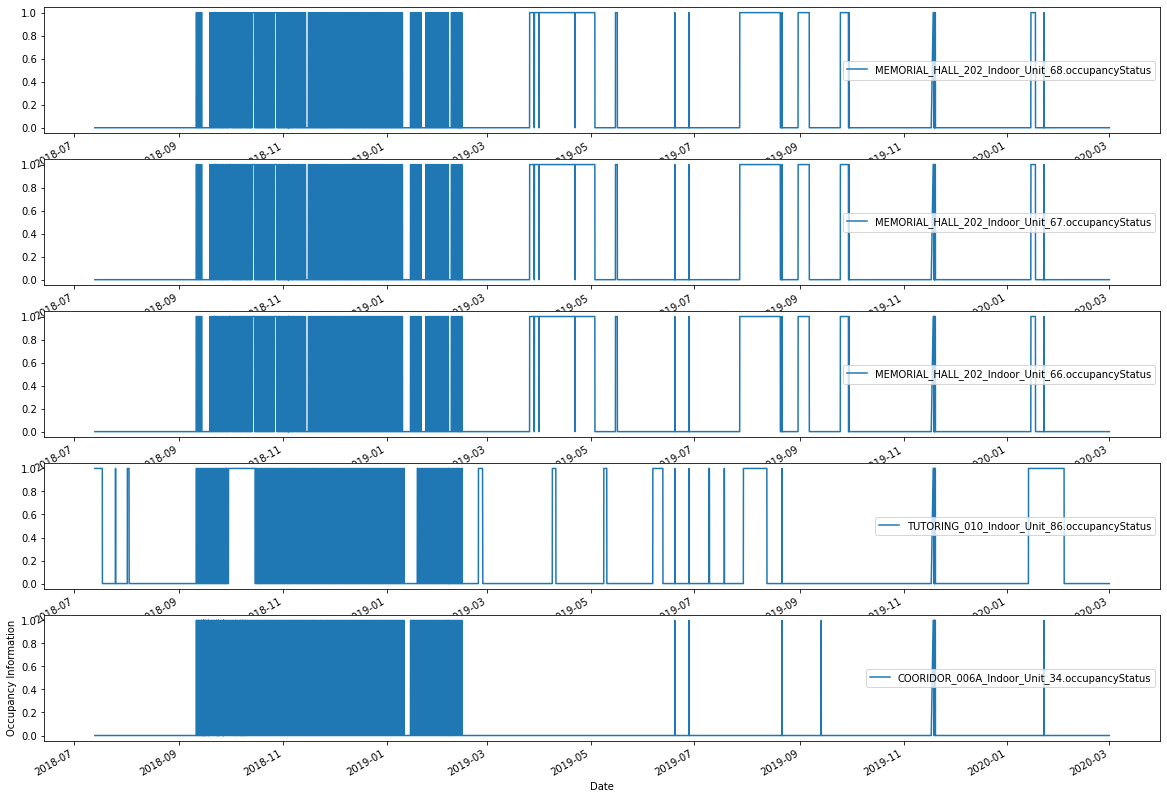

In [77]:
# plot the first 5 columns
start = 0
end = 5
dp.dataframeplot(df[df.columns[start:end]], style='-', xlabel='Date',
                 ylabel='Occupancy Information', lazy=False, legend=True)

Slicing Occupancy Data

In [78]:
# We want to look at data from 12th of July 9:17 am to 12th of July 01:23 pm
# We slice the data frame to look at the above mentioned date range using the command below
df_newOcc = df[(df.index >= '2019-07-12 09:17:00') & (df.index <= '2019-07-12 13:23:00')]
# look at the newly created dataframe after slicing
df_newOcc.head(50)

,MEMORIAL_HALL_202_Indoor_Unit_68.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_67.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_66.occupancyStatus,TUTORING_010_Indoor_Unit_86.occupancyStatus,COORIDOR_006A_Indoor_Unit_34.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_61.occupancyStatus,MEETING_117C_Indoor_Unit_62.occupancyStatus,CATERING_206_Indoor_Unit_81.occupancyStatus,READING_ROOM_206_Indoor_Unit_94.occupancyStatus,READING_ROOM_206_Indoor_Unit_95.occupancyStatus,OFFICE_115_Indoor_Unit_80.occupancyStatus,READING_ROOM_206_Indoor_Unit_93.occupancyStatus,STORAGE_014_Indoor_Unit_110.occupancyStatus,OFFICE_115_Indoor_Unit_77.occupancyStatus,ELEV_MACH_008_Indoor_Unit_39.occupancyStatus,UTILITY_004_Indoor_Unit_16.occupancyStatus,TUTORING_010_Indoor_Unit_10.occupancyStatus,TUTORING_010_Indoor_Unit_12.occupancyStatus,MEETING_117B_Indoor_Unit_19.occupancyStatus,MEETING_117A_Indoor_Unit_63.occupancyStatus,RECEIVING_109_Indoor_Unit_59.occupancyStatus,READING_ROOM_206_Indoor_Unit_92.occupancyStatus,TUTORING_010_Indoor_Unit_11.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_21.occupancyStatus,OFFICE_303_Indoor_Unit_102.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_97.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_98.occupancyStatus,LOBBY_111_Indoor_Unit_57.occupancyStatus,READING_ROOM_206_INDOR_UNIT_96.occupancyStatus,GENT_RR_016_Indoor_Unit_15.occupancyStatus,LOBBY_003_Indoor_Unit_13.occupancyStatus,CORRIDOR_108_Indoor_Unit_60.occupancyStatus,CORRIDOR_203_Indoor_Unit_64.occupancyStatus,CORRIDOR_309_Indoor_Unit_25.occupancyStatus,LOBBY_200_Indoor_Unit_79.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_99.occupancyStatus,OFFICE_304_Indoor_Unit_101.occupancyStatus,COORIDOR_006_Indoor_Unit_37.occupancyStatus,OFFICE_301_Indoor_Unit_104.occupancyStatus,CORRIDOR_310_Indoor_Unit_69.occupancyStatus,...,WRITING_STUDIO_113_Indoor_Unit_20.occupancyStatus,STAFF_KITCH_018_Indoor_Unit_113.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_76.occupancyStatus,MECH_ROOM_400_Indoor_Unit_106.occupancyStatus,MECH_ROOM_401_Indoor_Unit_112.occupancyStatus,READING_ROOM_206_Indoor_Unit_108.occupancyStatus,OFFICE_114_Indoor_Unit_78.occupancyStatus,STORAGE_001_Indoor_Unit_49.occupancyStatus,CORRIDOR_310_Indoor_Unit_72.occupancyStatus,CORRIDOR_013_Indoor_Unit_111.occupancyStatus,LOBBY_204_Indoor_Unit_65.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_100.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_83.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_86.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_87.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_84.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_85.occupancyStatus,WOMEN_RR_011_Indoor_Unit_38.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_82.occupancyStatus,CAFE_103_Indoor_Unit_55.occupancyStatus,READING_ROOM_206_Indoor_Unit_91.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_88.occupancyStatus,OFFICE_305_Indoor_Unit_74.occupancyStatus,LOBBY_300_Indoor_Unit_103.occupancyStatus,READING_ROOM_206_Indoor_Unit_89.occupancyStatus,CAFE_103_Indoor_Unit_51.occupancyStatus,ELEC_ROOM_005_Indoor_Unit_18.occupancyStatus,CAFE_103_Indoor_Unit_54.occupancyStatus,CAFE_103_Indoor_Unit_52.occupancyStatus,LOBBY_101_Indoor_Unit_48.occupancyStatus,CAFE_103_Indoor_Unit_56.occupancyStatus,WOMEN_RR_312_Indoor_Unit_70.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_58.occupancyStatus,TUTORING_010_Indoor_Unit_7.occupancyStatus,OFFICE_116_Indoor_Unit_24.occupancyStatus,TUTORING_010_Indoor_Unit_9.occupancyStatus,CAFE_103_Indoor_Unit_50.occupancyStatus,MECH_015_Indoor_Unit_107.occupancyStatus,GENT_RR_314_Indoor_Unit_71.occupancyStatus,MECH_017_Indoor_Unit_109.occupancyStatus
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-12 09:20:00,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
2019-07-12 09:25:00,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Energy Data Import

In [0]:
# load data path
energy_data = dp.readfile('./data/AH_Energy_Meter.csv',
                      timeformat='%m/%d/%Y %H:%M',
                      dateheading='Date')

# Basic preprocessing read data and perform certain available operations and return processed dataframe
processmethods = ['file2df', 'datetime_parse_df']
energy_data = energy_data.return_df(processmethods=processmethods)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DtypeWarning: Columns (64) have mixed types.Specify dtype option on import or set low_memory=False.
  import sys


In [0]:
# Drop Columns where more than X% of values are NaN
x = 8
energy_data = dp.dropNaNcols(energy_data, threshold = 1-(x/100))

# Drop entire rows with NaN cells
energy_data = dp.dropNaNrows(energy_data)

Slicing Eenrgy Data

In [0]:
# Let us look at the 1st 50 rows of the data
energy_data.head(50)

,ElectricMeterProfile.currentKbtuDeltaReading,ElectricMeterProfile.currentResourceDeltaReading,ElectricMeterProfile.meterInput,ElectricMeterProfile.meterStale,ElectricMeterProfile.originalKbtuDeltaReading,ElectricMeterProfile.originalResourceDeltaReading,ElectricMeterProfile.peak,ElectricMeterProfile.realPowerDemand,Total_KBTU_METER.currentKbtuDeltaReading,Total_KBTU_METER.currentResourceDeltaReading,Total_KBTU_METER.currentTimeDeltaReading,Total_KBTU_METER.meterInput,Total_KBTU_METER.meterStale,Total_KBTU_METER.originalKbtuDeltaReading,Total_KBTU_METER.originalResourceDeltaReading,CHW_BTU_METER.currentKbtuDeltaReading,CHW_BTU_METER.currentResourceDeltaReading,CHW_BTU_METER.currentTimeDeltaReading,CHW_BTU_METER.meterInput,CHW_BTU_METER.meterStale,CHW_BTU_METER.originalKbtuDeltaReading,CHW_BTU_METER.originalResourceDeltaReading,STM_BTU_METER.currentKbtuDeltaReading,STM_BTU_METER.currentResourceDeltaReading,STM_BTU_METER.meterInput,STM_BTU_METER.meterStale,STM_BTU_METER.originalKbtuDeltaReading,STM_BTU_METER.originalResourceDeltaReading,HW_BTU_METER.currentKbtuDeltaReading,HW_BTU_METER.currentResourceDeltaReading,HW_BTU_METER.meterInput,HW_BTU_METER.meterStale,HW_BTU_METER.originalKbtuDeltaReading,HW_BTU_METER.originalResourceDeltaReading
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-12 08:55:00,41.211020,12.07776,2066787.6,False,41.211020,12.07776,True,48.31104,76.967860,76.967860,301301.0,9662125.0,False,76.967860,76.967860,35.590466,35.590466,300309.0,2484930.0,False,35.590466,35.590466,0.166374,0.166374,125024.48,False,0.166374,0.166374,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:00:00,0.000000,0.00000,2066787.6,False,0.000000,0.00000,True,48.31104,33.198483,33.198483,299958.0,9662158.0,False,33.198483,33.198483,33.027813,33.027813,300950.0,2484963.0,False,33.027813,33.027813,0.166496,0.166496,125024.66,False,0.166496,0.166496,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:05:00,0.000000,0.00000,2066787.6,False,0.000000,0.00000,True,48.31104,31.936079,31.936079,300907.0,9662190.0,False,31.936079,31.936079,31.769627,31.769627,300907.0,2484994.8,False,31.769627,31.769627,0.166452,0.166452,125024.82,False,0.166452,0.166452,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:10:00,46.951607,13.76016,2066801.4,False,46.951607,13.76016,True,55.04064,81.313710,81.313710,299895.0,9662272.0,False,81.313710,81.313710,34.195640,34.195640,299895.0,2485029.0,False,34.195640,34.195640,0.166468,0.166468,125024.98,False,0.166468,0.166468,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:15:00,0.000000,0.00000,2066801.4,False,0.000000,0.00000,True,55.04064,31.248718,31.248718,301147.0,9662303.0,False,31.248718,31.248718,31.082222,31.082222,301147.0,2485060.2,False,31.082222,31.082222,0.166496,0.166496,125025.16,False,0.166496,0.166496,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:20:00,0.000000,0.00000,2066801.4,False,0.000000,0.00000,True,55.04064,28.415644,28.415644,293763.0,9662331.0,False,28.415644,28.415644,28.254465,28.254465,293763.0,2485088.5,False,28.254465,28.254465,0.161179,0.161179,125025.31,False,0.161179,0.161179,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:25:00,42.418920,12.43176,2066813.8,False,42.418920,12.43176,True,49.72704,72.058310,72.058310,297973.0,9662403.0,False,72.058310,72.058310,29.472635,29.472635,297973.0,2485117.8,False,29.472635,29.472635,0.166762,0.166762,125025.48,False,0.166762,0.166762,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:30:00,0.000000,0.00000,2066813.8,False,0.000000,0.00000,True,49.72704,32.454205,32.454205,301640.0,9662436.0,False,32.454205,32.454205,32.287254,32.287254,301639.0,2485150.2,False,32.287254,32.287254,0.166950,0.166950,125025.65,False,0.166950,0.166950,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:35:00,0.000000,0.00000,2066813.8,False,0.000000,0.00000,True,49.72704,38.913044,38.913044,301118.0,9662475.0,False,38.913044,38.913044,38.746120,38.746120,301119.0,2485189.0,False,38.746120,38.746120,0.166923,0.166923,125025.81,False,0.166923,0.166923,0.0,0.0,0.0,False,0.0,0.0


In [0]:
# We want to look at data from 12th of July 9:17 am to 12th of July 01:23 pm
# We slice the data frame to look at the above mentioned date range using the command below
df_new = energy_data[(energy_data.index >= '2019-04-01 00:00:01') & (energy_data.index <= '2019-04-30 23:59:59')]
# look at the newly created dataframe after slicing
df_new.head(50)

,ElectricMeterProfile.currentKbtuDeltaReading,ElectricMeterProfile.currentResourceDeltaReading,ElectricMeterProfile.meterInput,ElectricMeterProfile.meterStale,ElectricMeterProfile.originalKbtuDeltaReading,ElectricMeterProfile.originalResourceDeltaReading,ElectricMeterProfile.peak,ElectricMeterProfile.realPowerDemand,Total_KBTU_METER.currentKbtuDeltaReading,Total_KBTU_METER.currentResourceDeltaReading,Total_KBTU_METER.currentTimeDeltaReading,Total_KBTU_METER.meterInput,Total_KBTU_METER.meterStale,Total_KBTU_METER.originalKbtuDeltaReading,Total_KBTU_METER.originalResourceDeltaReading,CHW_BTU_METER.currentKbtuDeltaReading,CHW_BTU_METER.currentResourceDeltaReading,CHW_BTU_METER.currentTimeDeltaReading,CHW_BTU_METER.meterInput,CHW_BTU_METER.meterStale,CHW_BTU_METER.originalKbtuDeltaReading,CHW_BTU_METER.originalResourceDeltaReading,STM_BTU_METER.currentKbtuDeltaReading,STM_BTU_METER.currentResourceDeltaReading,STM_BTU_METER.meterInput,STM_BTU_METER.meterStale,STM_BTU_METER.originalKbtuDeltaReading,STM_BTU_METER.originalResourceDeltaReading,HW_BTU_METER.currentKbtuDeltaReading,HW_BTU_METER.currentResourceDeltaReading,HW_BTU_METER.meterInput,HW_BTU_METER.meterStale,HW_BTU_METER.originalKbtuDeltaReading,HW_BTU_METER.originalResourceDeltaReading
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:05:00,0.000000,0.00000,2406591.0,False,0.000000,0.00000,True,58.30512,10.732596,10.732596,300394.0,12700000.0,False,10.732596,10.732596,10.378136,10.378136,300394.0,3993577.2,False,10.378136,10.378136,0.0,0.0,126607.1,False,0.0,0.0,0.354332,0.354332,323942.97,False,0.0,0.354332
2019-04-01 00:10:00,110.031720,32.24712,2406623.2,False,110.031720,32.24712,True,64.49424,120.506630,120.506630,291366.0,12700000.0,False,120.506630,120.506630,10.125330,10.125330,291366.0,3993587.2,False,10.125330,10.125330,0.0,0.0,126607.1,False,0.0,0.0,0.360515,0.360515,323943.34,False,0.0,0.360515
2019-04-01 00:15:00,0.000000,0.00000,2406623.2,False,0.000000,0.00000,True,64.49424,19.903898,19.903898,301463.0,12700000.0,False,19.903898,19.903898,10.158030,10.158030,300468.0,3993597.5,False,10.158030,10.158030,0.0,0.0,126607.1,False,0.0,0.0,9.817516,9.817516,323953.16,False,0.0,9.817516
2019-04-01 00:20:00,0.000000,0.00000,2406623.2,False,0.000000,0.00000,True,64.49424,20.510168,20.510168,299543.0,12700000.0,False,20.510168,20.510168,9.917938,9.917938,300537.0,3993607.5,False,9.917938,9.917938,0.0,0.0,126607.1,False,0.0,0.0,10.541855,10.541855,323963.70,False,0.0,10.541855
2019-04-01 00:25:00,50.297280,14.74068,2406638.0,False,50.297280,14.74068,True,58.96272,71.203550,71.203550,300508.0,12700000.0,False,71.203550,71.203550,10.082831,10.082831,300508.0,3993617.5,False,10.082831,10.082831,0.0,0.0,126607.1,False,0.0,0.0,10.820359,10.820359,323974.50,False,0.0,10.820359
2019-04-01 00:30:00,0.000000,0.00000,2406638.0,False,0.000000,0.00000,True,58.96272,20.826271,20.826271,300375.0,12700000.0,False,20.826271,20.826271,9.879628,9.879628,300376.0,3993627.2,False,9.879628,9.879628,0.0,0.0,126607.1,False,0.0,0.0,10.948480,10.948480,323985.47,False,0.0,10.948480
2019-04-01 00:35:00,0.000000,0.00000,2406638.0,False,0.000000,0.00000,True,58.96272,20.921278,20.921278,300375.0,12700000.0,False,20.921278,20.921278,10.038765,10.038765,300375.0,3993637.5,False,10.038765,10.038765,0.0,0.0,126607.1,False,0.0,0.0,10.880699,10.880699,323996.34,False,0.0,10.880699
2019-04-01 00:40:00,50.034817,14.66376,2406652.5,False,50.034817,14.66376,True,58.65504,70.759190,70.759190,300550.0,12700000.0,False,70.759190,70.759190,9.920251,9.920251,300550.0,3993647.2,False,9.920251,9.920251,0.0,0.0,126607.1,False,0.0,0.0,10.802712,10.802712,324007.16,False,0.0,10.802712
2019-04-01 00:45:00,0.000000,0.00000,2406652.5,False,0.000000,0.00000,True,58.65504,20.218212,20.218212,300390.0,12700000.0,False,20.218212,20.218212,9.295396,9.295396,300390.0,3993656.5,False,9.295396,9.295396,0.0,0.0,126607.1,False,0.0,0.0,10.953374,10.953374,324018.10,False,0.0,10.953374


Finished 'dataframeplot' in 0.0383 secs


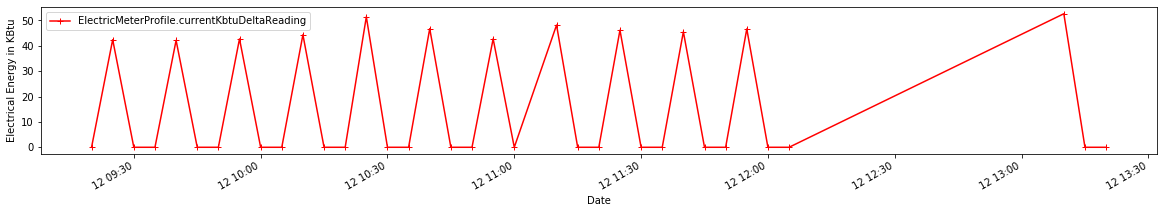

In [0]:
# In case we want to plot the "Electrical Energy" for the small section of data we just created
# plot the columns
dp.dataframeplot(df_new[['ElectricMeterProfile.currentKbtuDeltaReading']],
                 style='r+-',  # plot with red line and annotate points with '+' symbol and connect themby straight lines
                 xlabel='Date',
                 ylabel='Electrical Energy in KBtu',
                 lazy=False,
                 legend=True)

# Importing Occupancy Data

In [79]:
# load data path
occData = dp.readfile('./data/occupancyStatus.csv',
                      timeformat='%m/%d/%Y %H:%M',
                      dateheading='Date')

# Basic preprocessing read data and perform certain available operations and return processed dataframe. 
# Note: order of operations are important. For example we cannot parse datetime from the data before converting it
# from file to dataframe(file2df)
processmethods = ['file2df', 'datetime_parse_df']
occData = occData.return_df(processmethods=processmethods)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  if __name__ == '__main__':


In [0]:
# Drop Columns where more than 5% of values are NaN
occData = dp.dropNaNcols(df, threshold = 0.95)

# Drop entire rows with NaN cells
occData = dp.dropNaNrows(df)

In [84]:
occData.head()

,MEMORIAL_HALL_202_Indoor_Unit_68.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_67.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_66.occupancyStatus,TUTORING_010_Indoor_Unit_86.occupancyStatus,COORIDOR_006A_Indoor_Unit_34.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_61.occupancyStatus,MEETING_117C_Indoor_Unit_62.occupancyStatus,CATERING_206_Indoor_Unit_81.occupancyStatus,READING_ROOM_206_Indoor_Unit_94.occupancyStatus,READING_ROOM_206_Indoor_Unit_95.occupancyStatus,OFFICE_115_Indoor_Unit_80.occupancyStatus,READING_ROOM_206_Indoor_Unit_93.occupancyStatus,STORAGE_014_Indoor_Unit_110.occupancyStatus,OFFICE_115_Indoor_Unit_77.occupancyStatus,ELEV_MACH_008_Indoor_Unit_39.occupancyStatus,UTILITY_004_Indoor_Unit_16.occupancyStatus,TUTORING_010_Indoor_Unit_10.occupancyStatus,TUTORING_010_Indoor_Unit_12.occupancyStatus,MEETING_117B_Indoor_Unit_19.occupancyStatus,MEETING_117A_Indoor_Unit_63.occupancyStatus,RECEIVING_109_Indoor_Unit_59.occupancyStatus,READING_ROOM_206_Indoor_Unit_92.occupancyStatus,TUTORING_010_Indoor_Unit_11.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_21.occupancyStatus,OFFICE_303_Indoor_Unit_102.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_97.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_98.occupancyStatus,LOBBY_111_Indoor_Unit_57.occupancyStatus,READING_ROOM_206_INDOR_UNIT_96.occupancyStatus,GENT_RR_016_Indoor_Unit_15.occupancyStatus,LOBBY_003_Indoor_Unit_13.occupancyStatus,CORRIDOR_108_Indoor_Unit_60.occupancyStatus,CORRIDOR_203_Indoor_Unit_64.occupancyStatus,CORRIDOR_309_Indoor_Unit_25.occupancyStatus,LOBBY_200_Indoor_Unit_79.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_99.occupancyStatus,OFFICE_304_Indoor_Unit_101.occupancyStatus,COORIDOR_006_Indoor_Unit_37.occupancyStatus,OFFICE_301_Indoor_Unit_104.occupancyStatus,CORRIDOR_310_Indoor_Unit_69.occupancyStatus,...,STAFF_KITCH_018_Indoor_Unit_113.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_76.occupancyStatus,MECH_ROOM_400_Indoor_Unit_106.occupancyStatus,MECH_ROOM_401_Indoor_Unit_112.occupancyStatus,READING_ROOM_206_Indoor_Unit_108.occupancyStatus,OFFICE_114_Indoor_Unit_78.occupancyStatus,STORAGE_001_Indoor_Unit_49.occupancyStatus,CORRIDOR_310_Indoor_Unit_72.occupancyStatus,CORRIDOR_013_Indoor_Unit_111.occupancyStatus,LOBBY_204_Indoor_Unit_65.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_100.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_83.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_86.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_87.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_84.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_85.occupancyStatus,WOMEN_RR_011_Indoor_Unit_38.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_82.occupancyStatus,CAFE_103_Indoor_Unit_55.occupancyStatus,READING_ROOM_206_Indoor_Unit_91.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_88.occupancyStatus,OFFICE_305_Indoor_Unit_74.occupancyStatus,LOBBY_300_Indoor_Unit_103.occupancyStatus,READING_ROOM_206_Indoor_Unit_89.occupancyStatus,CAFE_103_Indoor_Unit_51.occupancyStatus,ELEC_ROOM_005_Indoor_Unit_18.occupancyStatus,CAFE_103_Indoor_Unit_54.occupancyStatus,CAFE_103_Indoor_Unit_52.occupancyStatus,LOBBY_101_Indoor_Unit_48.occupancyStatus,CAFE_103_Indoor_Unit_56.occupancyStatus,WOMEN_RR_312_Indoor_Unit_70.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_58.occupancyStatus,TUTORING_010_Indoor_Unit_7.occupancyStatus,OFFICE_116_Indoor_Unit_24.occupancyStatus,TUTORING_010_Indoor_Unit_9.occupancyStatus,CAFE_103_Indoor_Unit_50.occupancyStatus,MECH_015_Indoor_Unit_107.occupancyStatus,GENT_RR_314_Indoor_Unit_71.occupancyStatus,MECH_017_Indoor_Unit_109.occupancyStatus,fraction_occupied
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-13 07:50:00,0,0,0,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.805485
2018-07-13 07:55:00,0,0,0,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [0]:
 occData['fraction_occupied']= 1 -  occData.sum(axis=1)/df.shape[1]

In [86]:
occData['fraction_occupied']


Time
2018-07-13 07:50:00    0.805556
2018-07-13 07:55:00    0.805556
2018-07-13 08:00:00    0.805556
2018-07-13 08:05:00    0.805556
2018-07-13 08:10:00    0.805556
                         ...   
2020-02-29 23:35:00    0.916667
2020-02-29 23:40:00    0.916667
2020-02-29 23:45:00    0.916667
2020-02-29 23:50:00    0.916667
2020-02-29 23:55:00    0.916667
Name: fraction_occupied, Length: 170584, dtype: float64

In [87]:
# We want to look at data from 12th of July 9:17 am to 12th of July 01:23 pm
# We slice the data frame to look at the above mentioned date range using the command below
occNew = occData[(occData.index >= '2019-04-01 00:00:01') & (occData.index <= '2019-04-30 23:59:59')]
# look at the newly created dataframe after slicing
occNew.head(50)

,MEMORIAL_HALL_202_Indoor_Unit_68.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_67.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_66.occupancyStatus,TUTORING_010_Indoor_Unit_86.occupancyStatus,COORIDOR_006A_Indoor_Unit_34.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_61.occupancyStatus,MEETING_117C_Indoor_Unit_62.occupancyStatus,CATERING_206_Indoor_Unit_81.occupancyStatus,READING_ROOM_206_Indoor_Unit_94.occupancyStatus,READING_ROOM_206_Indoor_Unit_95.occupancyStatus,OFFICE_115_Indoor_Unit_80.occupancyStatus,READING_ROOM_206_Indoor_Unit_93.occupancyStatus,STORAGE_014_Indoor_Unit_110.occupancyStatus,OFFICE_115_Indoor_Unit_77.occupancyStatus,ELEV_MACH_008_Indoor_Unit_39.occupancyStatus,UTILITY_004_Indoor_Unit_16.occupancyStatus,TUTORING_010_Indoor_Unit_10.occupancyStatus,TUTORING_010_Indoor_Unit_12.occupancyStatus,MEETING_117B_Indoor_Unit_19.occupancyStatus,MEETING_117A_Indoor_Unit_63.occupancyStatus,RECEIVING_109_Indoor_Unit_59.occupancyStatus,READING_ROOM_206_Indoor_Unit_92.occupancyStatus,TUTORING_010_Indoor_Unit_11.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_21.occupancyStatus,OFFICE_303_Indoor_Unit_102.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_97.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_98.occupancyStatus,LOBBY_111_Indoor_Unit_57.occupancyStatus,READING_ROOM_206_INDOR_UNIT_96.occupancyStatus,GENT_RR_016_Indoor_Unit_15.occupancyStatus,LOBBY_003_Indoor_Unit_13.occupancyStatus,CORRIDOR_108_Indoor_Unit_60.occupancyStatus,CORRIDOR_203_Indoor_Unit_64.occupancyStatus,CORRIDOR_309_Indoor_Unit_25.occupancyStatus,LOBBY_200_Indoor_Unit_79.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_99.occupancyStatus,OFFICE_304_Indoor_Unit_101.occupancyStatus,COORIDOR_006_Indoor_Unit_37.occupancyStatus,OFFICE_301_Indoor_Unit_104.occupancyStatus,CORRIDOR_310_Indoor_Unit_69.occupancyStatus,...,STAFF_KITCH_018_Indoor_Unit_113.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_76.occupancyStatus,MECH_ROOM_400_Indoor_Unit_106.occupancyStatus,MECH_ROOM_401_Indoor_Unit_112.occupancyStatus,READING_ROOM_206_Indoor_Unit_108.occupancyStatus,OFFICE_114_Indoor_Unit_78.occupancyStatus,STORAGE_001_Indoor_Unit_49.occupancyStatus,CORRIDOR_310_Indoor_Unit_72.occupancyStatus,CORRIDOR_013_Indoor_Unit_111.occupancyStatus,LOBBY_204_Indoor_Unit_65.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_100.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_83.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_86.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_87.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_84.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_85.occupancyStatus,WOMEN_RR_011_Indoor_Unit_38.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_82.occupancyStatus,CAFE_103_Indoor_Unit_55.occupancyStatus,READING_ROOM_206_Indoor_Unit_91.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_88.occupancyStatus,OFFICE_305_Indoor_Unit_74.occupancyStatus,LOBBY_300_Indoor_Unit_103.occupancyStatus,READING_ROOM_206_Indoor_Unit_89.occupancyStatus,CAFE_103_Indoor_Unit_51.occupancyStatus,ELEC_ROOM_005_Indoor_Unit_18.occupancyStatus,CAFE_103_Indoor_Unit_54.occupancyStatus,CAFE_103_Indoor_Unit_52.occupancyStatus,LOBBY_101_Indoor_Unit_48.occupancyStatus,CAFE_103_Indoor_Unit_56.occupancyStatus,WOMEN_RR_312_Indoor_Unit_70.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_58.occupancyStatus,TUTORING_010_Indoor_Unit_7.occupancyStatus,OFFICE_116_Indoor_Unit_24.occupancyStatus,TUTORING_010_Indoor_Unit_9.occupancyStatus,CAFE_103_Indoor_Unit_50.occupancyStatus,MECH_015_Indoor_Unit_107.occupancyStatus,GENT_RR_314_Indoor_Unit_71.occupancyStatus,MECH_017_Indoor_Unit_109.occupancyStatus,fraction_occupied
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:05:00,1,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.75926
2019-04-01 00:10:00,1,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1

In [88]:
# Pandas infers nominal data as object data type. Convert all columns to categorical data type
occNew[occNew.columns] = occNew[occNew.columns].astype('category')

# Convert the categorical data to numerical data eg occupied -> 0, unoccupied -> 1. Tthis will be useful for objective
# analysis
occNew[occNew.columns] = occNew[occNew.columns].apply(lambda x: x.cat.codes)

# sort dataframe columns alphabetically if needed
#df = df.reindex(sorted(df.columns), axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Finished 'dataframeplot' in 0.6112 secs


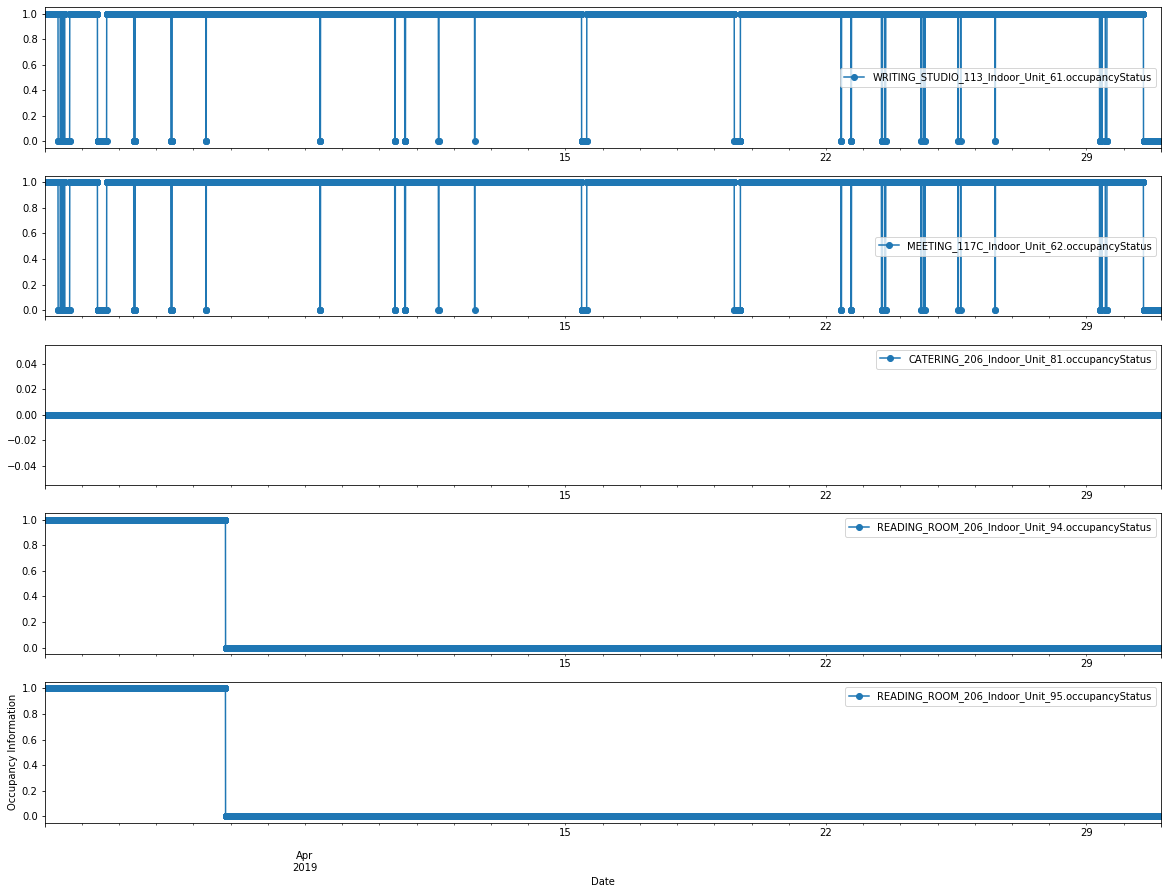

In [89]:
# plot the first 5 columns
start = 5
end = 10
dp.dataframeplot(occNew[occNew.columns[start:end]], style='o-', xlabel='Date',
                 ylabel='Occupancy Information', lazy=False, legend=True)

#Occupancy Percentage Calculations

In [0]:
import matplotlib.pyplot as plt

In [0]:
occData['fraction_occupied'] = 1 -  occData.sum(axis=1)/df.shape[1]

In [0]:
newData = occData[(occData['fraction_occupied'].index >= '2019-04-01 10:00:01') & (occData['fraction_occupied'].index <= '2019-04-01 10:30:00')]

In [117]:
print(newData['fraction_occupied'])

Time
2019-04-01 10:05:00    0.805556
2019-04-01 10:10:00    0.759259
2019-04-01 10:15:00    0.759259
2019-04-01 10:20:00    0.759259
2019-04-01 10:25:00    0.805556
2019-04-01 10:30:00    0.805556
Name: fraction_occupied, dtype: float64


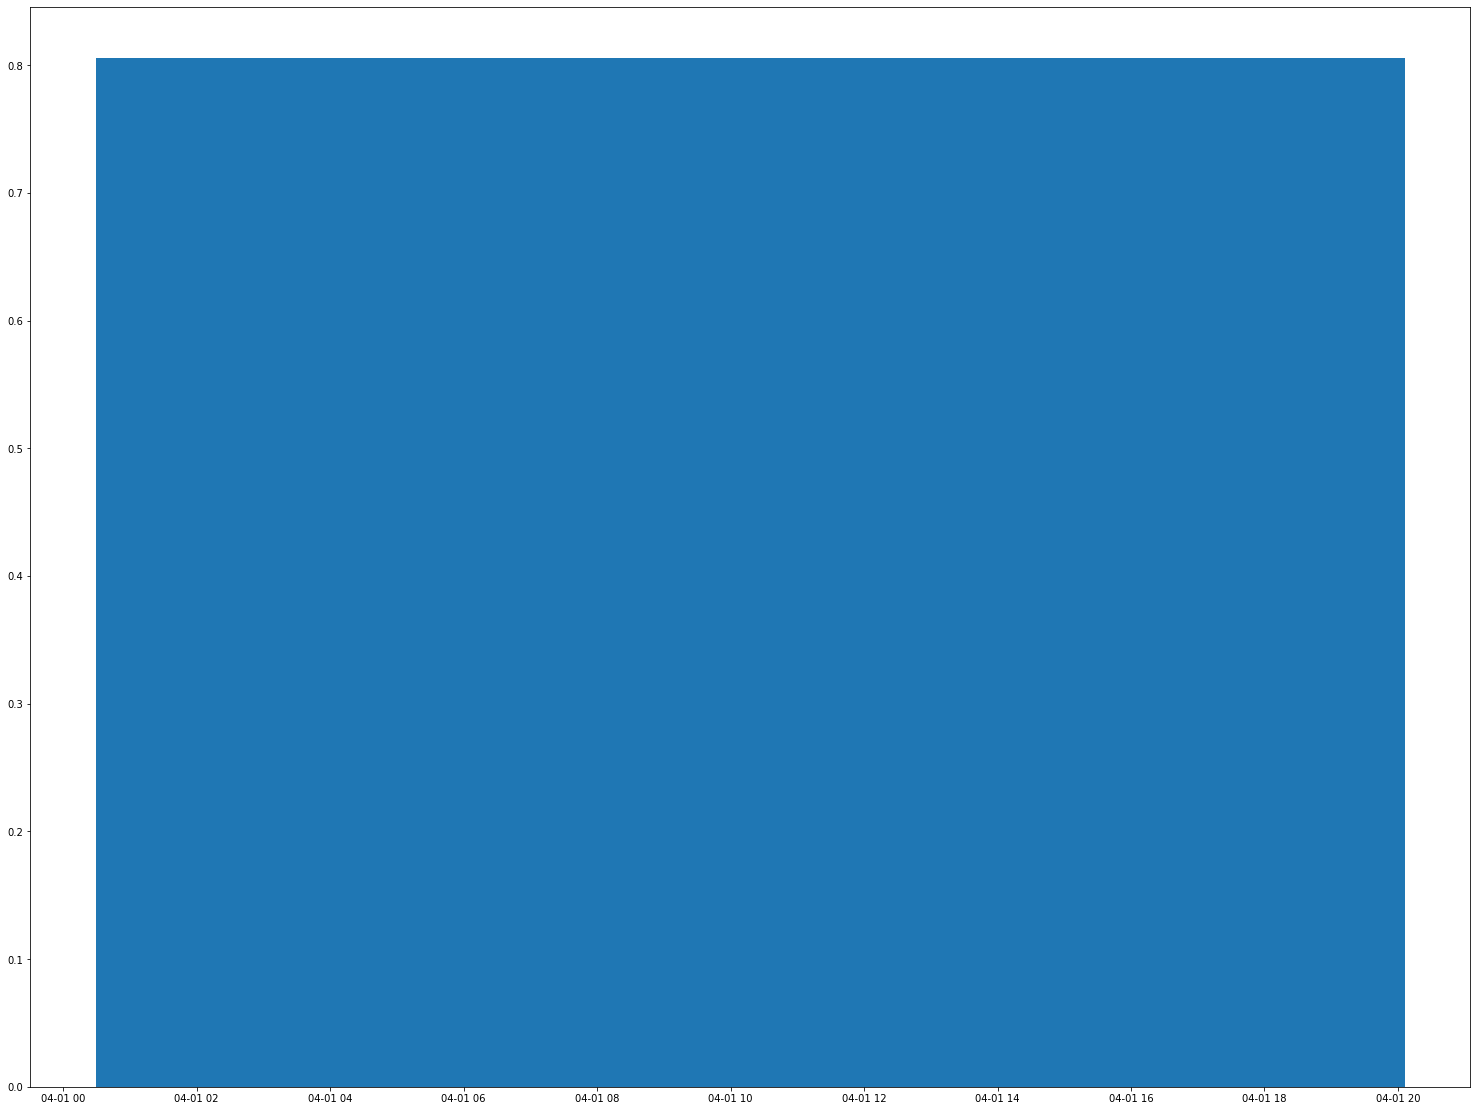

In [124]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = newData['fraction_occupied'].index
y = newData['fraction_occupied']
ax.bar(x,y)
plt.show()